## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Seinfeld!
Arguably the greatest sitcom ever made and certainly my most favourite show ever.

[From Wikipedia](https://en.wikipedia.org/wiki/Seinfeld):
> Seinfeld is an American live-action sitcom created by Larry David and Jerry Seinfeld for NBC. Set predominantly in an apartment building in Manhattan's Upper West Side in New York City, the show features a handful of Jerry Seinfeld's (as a fictionalized version of himself) friends and acquaintances, including best friend George Costanza (Jason Alexander), friend and former girlfriend Elaine Benes (Julia Louis-Dreyfus), and neighbor across the hall Cosmo Kramer (Michael Richards). 

This quick description just scratches the surface of what Seinfeld was and still is; an iconic creation that is frequently ranked by publications such as 'Rolling Stone' and 'Entertainment Weekly' as one of the best comnedies ever made and voted by the 'Writers Guild of America' the No. 2 Best Written TV Series of All Time. Seinfeld has become a cultural touchstone and deeply embedded piece of the cultural zeitgeist spawning words like 'close-talker', catch-phrases like "It's gold, Jerry.Gold!", the truly unique "Elaine Dance" and even a new holiday "Festivus"! Seinfeld had an immeasurable impact on the pop-culture landscape but in this notebook, I plan to use Exploratory Data Analysis and Deep Learning on the complete scripts from the show's entire run  and do just a little bit of measuring.

The dataset can be found on kaggle [here](https://www.kaggle.com/thec03u5/seinfeld-chronicles) and consists of 2 tables:
- episode_info.csv
- scripts.csv

<b>episode_info</b> consists of meta-data for each episode, including the episode name and number original air-date

<b>scripts</b> consists of the dialogue spoken by each character and the character that spoke it.

Let's begin by loading the episode_info table into a pandas DataFrame and learning a little more about the show!

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
episodes=pd.read_csv('episode_info.csv',index_col='Unnamed: 0')
episodes.head()

,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,1.0,"Good News, Bad News","July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E01
1,1.0,1.0,The Stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2.0,The Robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3.0,Male Unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4.0,The Stock Tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04


<b>Seinfeld Trivia!</b>
The original pilot of Seinfeld (originally entitled 'The Seinfeld Chronicles') 'Good News, Bad News' was not picked up! NBC did eventually order 4 additional episodes that make up the first season, a record for smallest episode order in US TV history!
    
We can see this reflected in the data head dispalyed above. There are 2 entries both labelled Season 1, Episode 1 i.e S01E01
To prevent any confusion later on, the pilot episode 'Good News, Bad News' will be re-numbered Season 1, Epsidoe 0 - S01E00

In [26]:
episodes['EpisodeNo'][0]=0
episodes['SEID'][0]='S01E00'
episodes.head()

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Season,EpisodeNo,Title,AirDate,Writers,Director,SEID
0,1.0,0,"Good News, Bad News","July 5, 1989","Larry David, Jerry Seinfeld",Art Wolff,S01E00
1,1.0,1,The Stakeout,"May 31, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E01
2,1.0,2,The Robbery,"June 7, 1990",Matt Goldman,Tom Cherones,S01E02
3,1.0,3,Male Unbonding,"June 14, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E03
4,1.0,4,The Stock Tip,"June 21, 1990","Larry David, Jerry Seinfeld",Tom Cherones,S01E04


So lets confirm some basic info about the show for anyone who doesn't know

In [28]:
print('Seinfeld ran for',len(episodes.Season.unique()),'seasons consisting of',len(episodes.index), 'episodes')
print('The pilot episode aired on',episodes['AirDate'][0], 'but the first full season began on',episodes['AirDate'][1])
print('The final episode aired on',episodes['AirDate'][173])

Seinfeld ran for 9 seasons consisting of 174 episodes
The pilot episode aired on July 5, 1989 but the first full season began on May 31, 1990
The final episode aired on May 14, 1998


With 174 episodes and 9 seasons, on average each season we would expect to consist of 174/9=19.33 episodes, is this the case?

In [40]:
season_size=episodes.groupby('Season').size()
season_size

Season
1.0     5
2.0    12
3.0    23
4.0    24
5.0    21
6.0    22
7.0    24
8.0    22
9.0    21
dtype: int64

Nope. As I stated before the first season consists of the pilot plus 4 episodes but the second season is also shorter at just 12 episodes. But is this exactly true?

In [41]:
season_lastep= episodes.groupby('Season').max()['EpisodeNo']
season_lastep

Season
1.0     4.0
2.0    12.0
3.0    23.0
4.0    24.0
5.0    22.0
6.0    24.0
7.0    24.0
8.0    22.0
9.0    23.0
Name: EpisodeNo, dtype: float64

These episode numbers are different! The final episode in each season does not match up with the length of each season.


23.0

In [53]:
for i in range(1,10):
    if season_size[i]!=season_lastep[i]:
        print('Season {} has inconsistent season length and last episode number; inconsistency = {}'.format(i,season_lastep[i]-season_size[i]))


Season 1 has inconsistent season length and last episode number; inconsistency = -1.0
Season 5 has inconsistent season length and last episode number; inconsistency = 1.0
Season 6 has inconsistent season length and last episode number; inconsistency = 2.0
Season 9 has inconsistent season length and last episode number; inconsistency = 2.0


Season 1, as we know, has been given an episode 0 so this accounts for the difference but what about the other three seasons?

In [50]:
episodes.loc[episodes['Season']==5][['EpisodeNo','Title']]

,EpisodeNo,Title
64,1,The Mango
65,2,The Puffy Shirt
66,3,The Glasses
67,4,The Sniffing Accountant
68,5,The Bris
69,6,The Lip Reader
70,7,The Non-Fat Yogurt
71,8,The Barber
72,9,The Masseuse
73,10,The Cigar Store Indian


There's no episdoe 19!
Its ok though, season 2 episode 18 'The Raincoats' is actually a 2 part episode:<br>
https://en.wikipedia.org/wiki/The_Raincoats_(Seinfeld)


In [51]:
episodes.loc[episodes['Season']==6][['EpisodeNo','Title']]

,EpisodeNo,Title
85,1,The Chaperone
86,2,The Big Salad
87,3,The Pledge Drive
88,4,The Chinese Woman
89,5,The Couch
90,6,The Gymnast
91,7,The Soup
92,8,The Mom &amp; Pop Store
93,9,The Secretary
94,10,The Race


In season 6 there are 2 numbers missing, episodes 14 and 15.
Again this is a 2 part episode but in this case the episode has been completely cut from the dataset as it is a clip episode and contains little or no new data. <br>
https://en.wikipedia.org/wiki/The_Highlights_of_100

In [54]:
episodes.loc[episodes['Season']==9][['EpisodeNo','Title']]

,EpisodeNo,Title
153,1,The Butter Shave
154,2,The Voice
155,3,The Serenity Now
156,4,The Blood
157,5,The Junk Mail
158,6,The Merv Griffin Show
159,7,The Slicer
160,8,The Betrayal
161,9,The Apology
162,10,The Strike


Episodes 21 and 22 are missing. Again this is a clip episode that has been cut from the dataset already<br>
https://en.wikipedia.org/wiki/The_Chronicle_(Seinfeld)

I *know* there are other 2 part episodes, but these appear to have been treated differently to 'The Raincoats' in season 5

In [55]:
episodes.loc[episodes['Season']==7][['EpisodeNo','Title']]

,EpisodeNo,Title
107,1,The Engagement
108,2,The Postponement
109,3,The Maestro
110,4,The Wink
111,5,The Hot Tub
112,6,The Soup Nazi
113,7,The Secret Code
114,8,The Pool Guy
115,9,The Sponge
116,10,The Gum


This list  of episdoes in Season 7 makes it clear, the two-part episodes here are given annotations to their titles. I don't know why 'The Raincoats' in season 5 is treated differently than the 2 two-part episdoes in season 7 but this can be addressed in the corpus of the script texts as needed

In [57]:
for i in episodes['Title']:
    if i.startswith('The')==False:
        print(i)

Good News, Bad News
Male Unbonding


There are just 2 episodes that do not have a title starting with the word 'The' both of these are in the first season. It appears after this it became something of convention for the writers

In [58]:
episodes.Writers.unique()

array(['Larry David, Jerry Seinfeld', 'Matt Goldman', 'Peter Mehlman',
       'Larry David', 'Larry Charles', 'Elaine Pope', 'Tom Leopold',
       'Larry David and Bob Shaw, Don McEnery',
       'Larry David, Jerry Seinfeld and Matt Goldman',
       'Larry David and Bill Masters', 'Elaine Pope, Larry Charles',
       'Larry David and Larry Levin',
       'Larry Charles / Story By Marc Jaffe',
       'Larry David and Greg Daniels', 'Larry David, Larry Charles',
       'Steve Skrovan, Bill Masters, Jon Hayman', 'Bruce Kirschbaum',
       'Andy Robin', 'Larry David, Peter Mehlman',
       'Lawrence H. Levy, Buck Dancer (Larry David pseudonym)',
       'Tom Gammill, Max Pross', 'Carol Leifer',
       'Ron Hague, Charlie Rubin',
       'Tom Gammill, Max Pross and Larry David, Jerry Seinfeld',
       'Peter Mehlman, Carol Leifer',
       'Andy Cowan and Larry David, Jerry Seinfeld',
       'Larry David, Bill Masters, Bob Shaw', 'Alec Berg, Jeff Schaffer',
       'Fred Stoller', 'Carol Leifer

In [63]:
names=[]
for i in episodes['Writers'].unique():
    names.append(i.replace(' and ',',').split(','))
names

[['Larry David', ' Jerry Seinfeld'],
 ['Matt Goldman'],
 ['Peter Mehlman'],
 ['Larry David'],
 ['Larry Charles'],
 ['Elaine Pope'],
 ['Tom Leopold'],
 ['Larry David', 'Bob Shaw', ' Don McEnery'],
 ['Larry David', ' Jerry Seinfeld', 'Matt Goldman'],
 ['Larry David', 'Bill Masters'],
 ['Elaine Pope', ' Larry Charles'],
 ['Larry David', 'Larry Levin'],
 ['Larry Charles / Story By Marc Jaffe'],
 ['Larry David', 'Greg Daniels'],
 ['Larry David', ' Larry Charles'],
 ['Steve Skrovan', ' Bill Masters', ' Jon Hayman'],
 ['Bruce Kirschbaum'],
 ['Andy Robin'],
 ['Larry David', ' Peter Mehlman'],
 ['Lawrence H. Levy', ' Buck Dancer (Larry David pseudonym)'],
 ['Tom Gammill', ' Max Pross'],
 ['Carol Leifer'],
 ['Ron Hague', ' Charlie Rubin'],
 ['Tom Gammill', ' Max Pross', 'Larry David', ' Jerry Seinfeld'],
 ['Peter Mehlman', ' Carol Leifer'],
 ['Andy Cowan', 'Larry David', ' Jerry Seinfeld'],
 ['Larry David', ' Bill Masters', ' Bob Shaw'],
 ['Alec Berg', ' Jeff Schaffer'],
 ['Fred Stoller'],
 ['Ca

In [69]:
writers=set(([item.strip() for sublist in names for item in sublist]))
writers

{'Alec Berg',
 'Andy Cowan',
 'Andy Robin',
 'Bill Masters',
 'Bob Shaw',
 'Bruce Eric Kaplan',
 'Bruce Kirschbaum',
 'Buck Dancer (Larry David pseudonym)',
 'Carol Leifer',
 'Charlie Rubin',
 "Dan O'Keefe",
 'Darin Henry',
 'David Mandel',
 'Don McEnery',
 'Elaine Pope',
 'Fred Stoller',
 'Greg Daniels',
 'Gregg Kavet',
 'Jeff Schaffer',
 'Jeff Schaffer.',
 'Jennifer Crittenden',
 'Jerry Seinfeld',
 'Jill Franklyn',
 'Jon Hayman',
 'Larry Charles',
 'Larry Charles / Story By Marc Jaffe',
 'Larry David',
 'Larry Levin',
 'Lawrence H. Levy',
 'Marjorie Gross',
 'Matt Goldman',
 'Max Pross',
 'Peter Mehlman',
 'Ron Hague',
 'Sam Kass',
 'Spike Feresten',
 'Steve Koren',
 'Steve Lookner',
 "Steve O'Donnell",
 'Steve Skrovan',
 'Tom Gammill',
 'Tom Leopold'}

In [70]:
len(writers)

42

40 different writers worked on the various episodes not  including Marc Jaffe who has only a story credit and Buck Dancer, which is a psuedonym for Larry David

In [101]:
writers_episodes=dict()
for writer in writers:
    writers_episodes[writer]=0
for writer in writers:
    for ep in episodes.Writers:
        if writer in ep:
            writers_episodes[writer]+=1
            
#Manual Corrections:
#'Larry David' and 'Larry Charles' get one more episode credit each, 'Buck Dancer' and 'Marc Jaffe' are removed
writers_episodes['Larry David']+=1
writers_episodes['Larry Charles']+=1
del writers_episodes['Larry Charles / Story By Marc Jaffe']
del writers_episodes['Buck Dancer (Larry David pseudonym)']
writers_episodes

{'Alec Berg': 14,
 'Andy Robin': 13,
 'Gregg Kavet': 11,
 'Tom Leopold': 2,
 'Steve Lookner': 1,
 'Lawrence H. Levy': 1,
 'Peter Mehlman': 19,
 'Sam Kass': 1,
 'Steve Koren': 5,
 'Max Pross': 13,
 'Fred Stoller': 1,
 'Carol Leifer': 6,
 'Bruce Eric Kaplan': 3,
 'Jeff Schaffer.': 1,
 'Charlie Rubin': 1,
 'Andy Cowan': 1,
 'Larry David': 59,
 'Larry Charles': 20,
 'Jennifer Crittenden': 6,
 'Elaine Pope': 2,
 'Bob Shaw': 2,
 "Steve O'Donnell": 2,
 'Jerry Seinfeld': 18,
 'Don McEnery': 1,
 'Tom Gammill': 13,
 "Dan O'Keefe": 5,
 'Darin Henry': 1,
 'Jon Hayman': 1,
 'Bill Masters': 3,
 'Greg Daniels': 1,
 'Ron Hague': 1,
 'Spike Feresten': 9,
 'David Mandel': 9,
 'Bruce Kirschbaum': 3,
 'Matt Goldman': 2,
 'Larry Levin': 2,
 'Jill Franklyn': 1,
 'Steve Skrovan': 1,
 'Jeff Schaffer': 14,
 'Marjorie Gross': 4}

In [102]:
writers_episodes.values()

dict_values([14, 13, 11, 2, 1, 1, 19, 1, 5, 13, 1, 6, 3, 1, 1, 1, 59, 20, 6, 2, 2, 2, 18, 1, 13, 5, 1, 1, 3, 1, 1, 9, 9, 3, 2, 2, 1, 1, 14, 4])

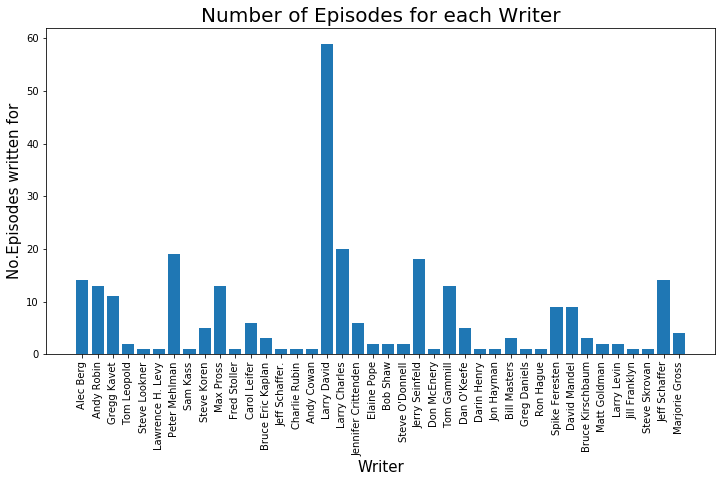

In [107]:
plt.figure(figsize=(12,6))
plt.bar(writers_episodes.keys(),writers_episodes.values())
plt.xlabel('Writer',size=15)
plt.ylabel('No.Episodes written for',size=15)
plt.title('Number of Episodes for each Writer',size=20)
plt.xticks(rotation=90)
plt.show()